In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [126]:
''' Reading Data'''

data = pd.read_csv('indian_liver_patient.csv')

In [127]:
''' Displaying First 5 Rows'''

data.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [128]:
''' Shape of data '''

print("Number of rows in the dataset are:", data.shape[0])
print("Number of rows in the dataset are:", data.shape[1])

Number of rows in the dataset are: 583
Number of rows in the dataset are: 11


In [129]:
''' Types of Data '''

data.dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [130]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [131]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [132]:
'''Checking Null or Missing Values'''

data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [133]:
Total = data.isnull().sum().sort_values(ascending=False)

Percent = (data.isnull().sum() * 100 / data.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

missing_data

,Total,Percentage of Missing Values
Albumin_and_Globulin_Ratio,4,0.686106
Age,0,0.000000
Gender,0,0.000000
Total_Bilirubin,0,0.000000
Direct_Bilirubin,0,0.000000
Alkaline_Phosphotase,0,0.000000
Alamine_Aminotransferase,0,0.000000
Aspartate_Aminotransferase,0,0.000000
Total_Protiens,0,0.000000
Albumin,0,0.000000


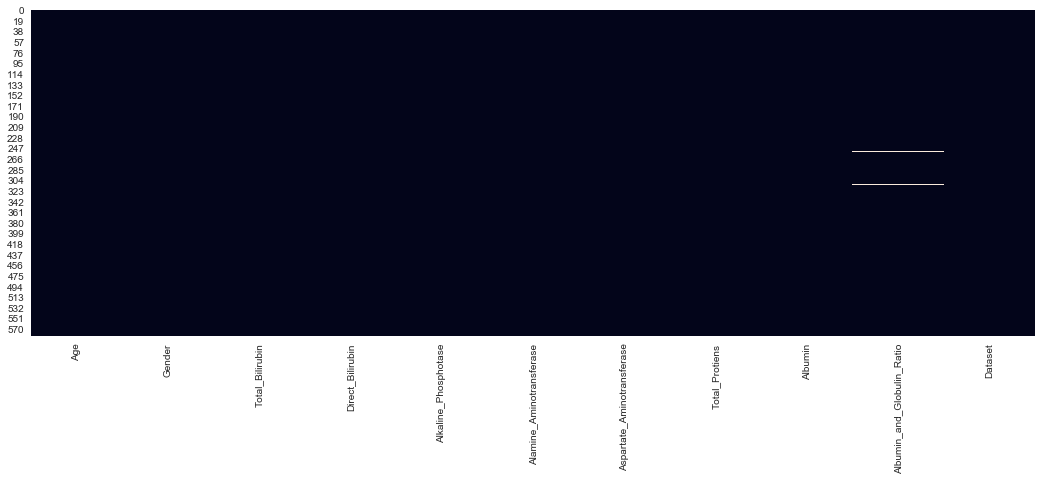

In [134]:
plt.figure(figsize = (18,6))

sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [76]:
## We can observe that except 'Albumin_and_Globulin_Ratio' other columns doesn't have any Null values. 

In [135]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean())

In [136]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

#### Imputed the Albumin_and_Globulin_Ratio column with it's mean thereafter we can see that there are no missing values in any of the columns. 

In [137]:
'''Mapping Gender column'''

data['Gender'] = data['Gender'].map({'Male' : 1, 'Female' : 2})

In [138]:
'Renaming Target Variable for convinience'

data.rename(columns = {'Dataset' : 'Outcome'}, inplace = True)

In [139]:
data.head(2)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,65,2,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1


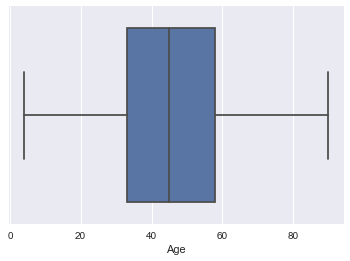

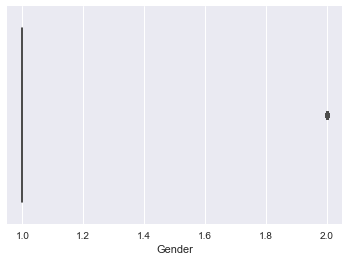

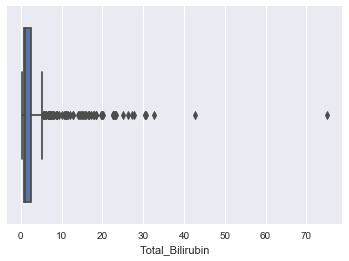

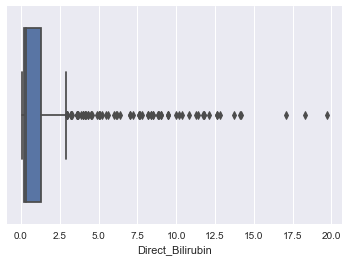

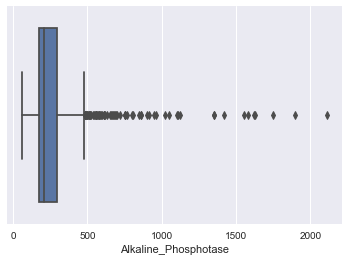

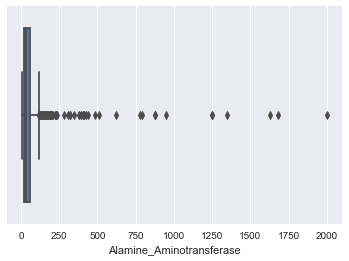

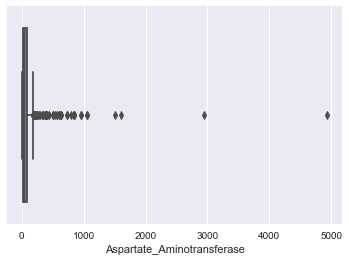

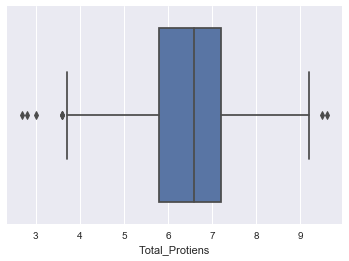

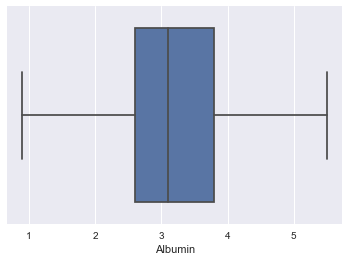

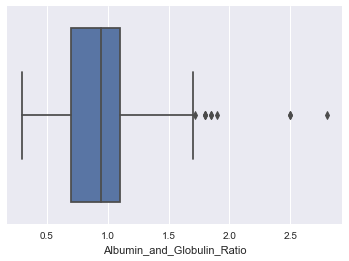

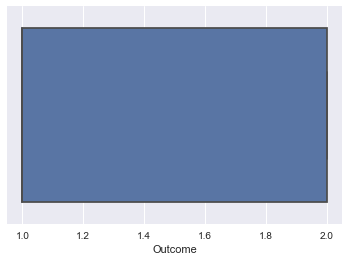

In [82]:
'''Checking Outlier Values'''

import warnings 
warnings.filterwarnings('ignore')

for i in data.columns:
    sns.boxplot(data[i])
    plt.show()

#### We can observe that there are some outliers in the Cols: 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', but we are conituning ahead without handling outliers, and if in case after building the base model, we find it hard to predict then will go ahead and handle the Outliers using IQR method.

In [18]:
# We have encoded the Gender column and also renamed the Dataset column to make it more feasible.

In [83]:
'''Summary Statistics'''

data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,1.243568,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,1.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,2.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


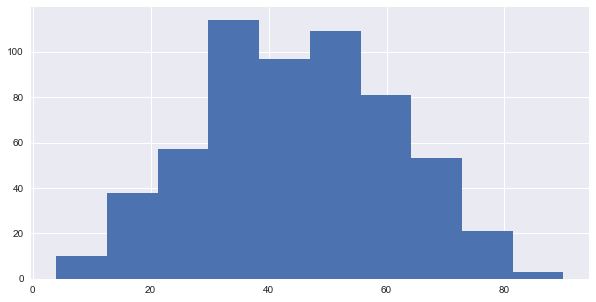

In [84]:
#Understand various summary statistics of the data

include =['object', 'float', 'int'] 
data.describe(include=include)
data.describe()#Get count of values in a categorical variable
data.Outcome.value_counts()
data.Age.hist(figsize=(10,5))

In [140]:
data_cat = data.select_dtypes(include = 'object')
len(data_cat.columns)

0

In [141]:
data_num = data.select_dtypes(include = 'number')
len(data_num.columns)

11

#### As I have encoded the Gender column from 'object' to 'int', there are no categorical columns in the dataset.

In [142]:
data_num.count()

Age                           583
Gender                        583
Total_Bilirubin               583
Direct_Bilirubin              583
Alkaline_Phosphotase          583
Alamine_Aminotransferase      583
Aspartate_Aminotransferase    583
Total_Protiens                583
Albumin                       583
Albumin_and_Globulin_Ratio    583
Outcome                       583
dtype: int64

In [143]:
(data['Age'].value_counts())*100/len(data)

60    5.831904
45    4.288165
50    3.945111
38    3.602058
42    3.602058
        ...   
8     0.171527
78    0.171527
84    0.171527
85    0.171527
90    0.171527
Name: Age, Length: 72, dtype: float64

In [144]:
(data['Gender'].value_counts())*100/len(data)

1    75.643225
2    24.356775
Name: Gender, dtype: float64

In [145]:
(data['Outcome'].value_counts())*100/len(data)

1    71.35506
2    28.64494
Name: Outcome, dtype: float64

### Data Analysis through Plots

In [146]:
data.Gender.value_counts()

1    441
2    142
Name: Gender, dtype: int64

In [147]:
data.Gender.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'

1    75.6%
2    24.4%
Name: Gender, dtype: object

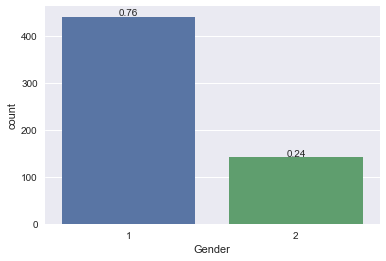

In [148]:
ax = sns.countplot(x = 'Gender',data = data) 
total = float(len(data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

In [149]:
## Male proportion is higher than the Female proportion in the dataset provided.

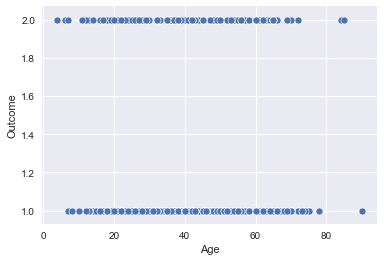

In [95]:
sns.scatterplot(x = data['Age'], y = data['Outcome'], data = data)
plt.show()

In [96]:
print("Unhealthy patients: {}".format(data['Outcome'].value_counts()[1]))
print("Healthy patients: {}".format(data['Outcome'].value_counts()[2]))

Unhealthy patients: 416
Healthy patients: 167


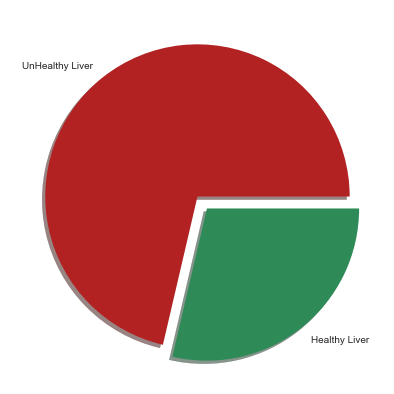

In [97]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(7,7))

plt.pie(x=data["Outcome"].value_counts(), 
        colors=["firebrick","seagreen"], 
        labels=["UnHealthy Liver","Healthy Liver"], 
        shadow = True, 
        explode = (0, 0.1)
        )

plt.show()

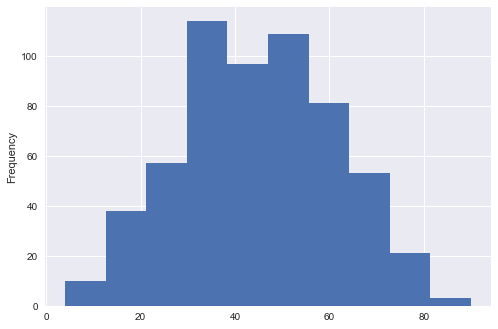

In [98]:
data['Age'].plot(kind = 'hist', stacked = False)

In [99]:
import plotly.express as px
fig = px.box(data,x='Outcome',y='Age', color='Gender')
fig.show()

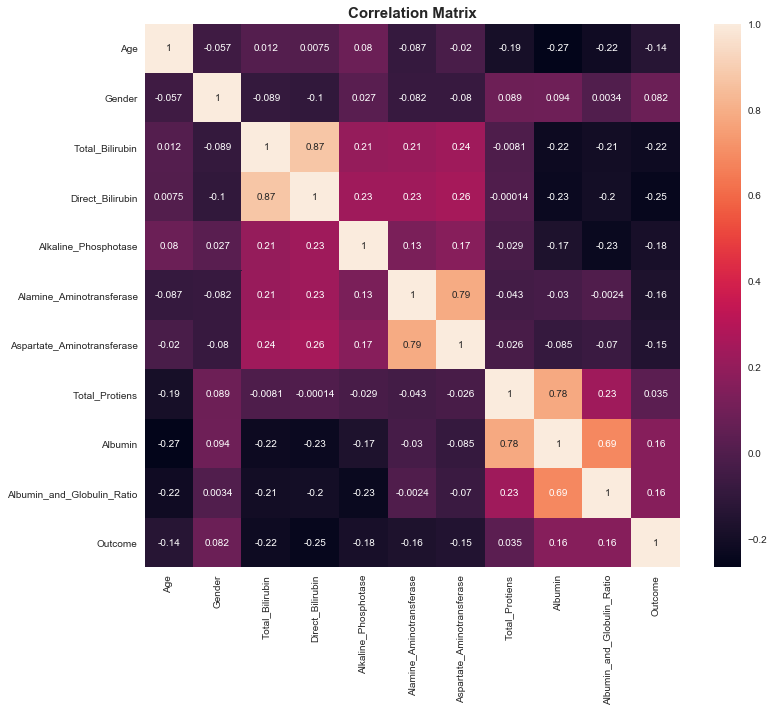

In [100]:
'''Correlation Matrix'''

plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), annot = True)
plt.title('Correlation Matrix', size = '15', weight = 'bold')
plt.show()

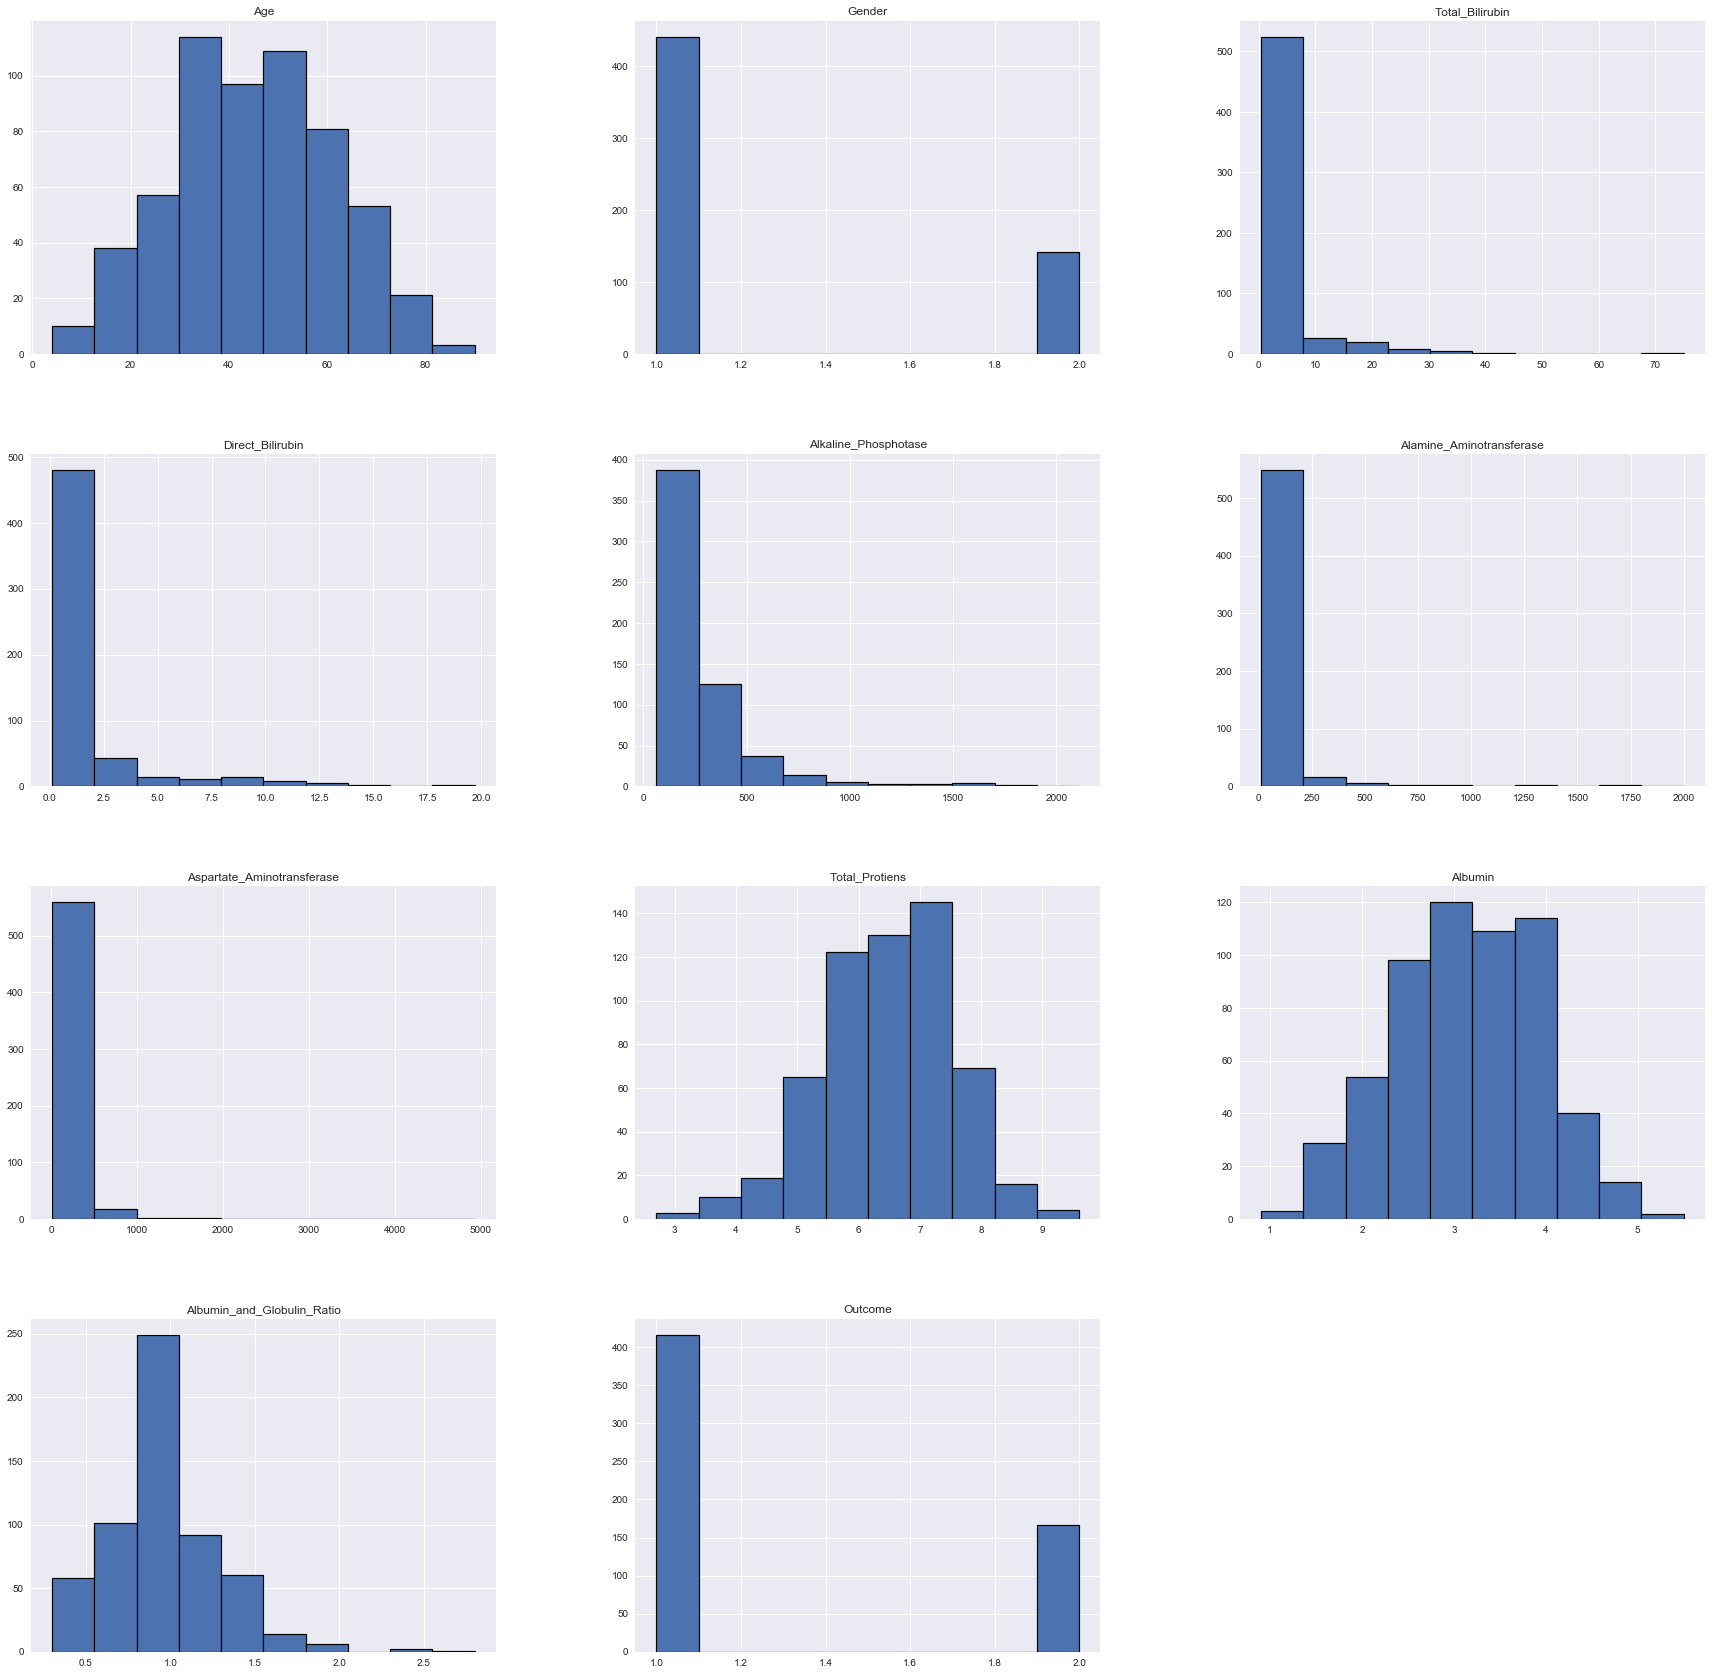

In [101]:
data.hist(edgecolor="black", linewidth=1.2, figsize=(30, 30));

-> Total_Proteins and Albumin have Normal Distribution

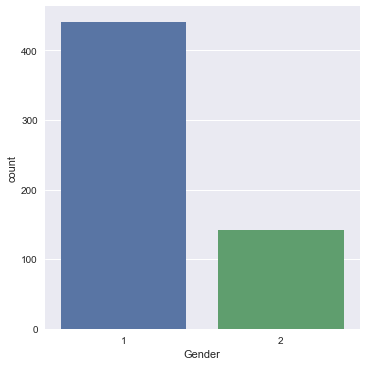

In [103]:
sns.catplot('Gender', data = data, kind = 'count')

In [156]:
X = data.drop('Outcome', axis = 1)
Y = data['Outcome']

In [157]:
X.head(2)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,2,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74


In [158]:
Y.value_counts()

1    416
0    167
Name: Outcome, dtype: int64

In [159]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [160]:
#df_num = data.select_dtypes(include=np.number)

X_scaler = StandardScaler()

num_scaled = X_scaler.fit_transform(X)

df_num_scaled = pd.DataFrame(num_scaled, columns = X.columns)

X = pd.DataFrame(df_num_scaled, columns = X.columns)
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.252098,1.762281,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147898
1,1.066637,-0.567446,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650697
2,1.066637,-0.567446,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.179323
3,0.819356,-0.567446,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166351
4,1.684839,-0.567446,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.719144


In [155]:
data['Outcome'].replace(2,0,inplace=True)

In [161]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =   0.3, random_state = 10) 

In [162]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(408, 11)
(175, 11)
(408,)
(175,)


## Base Model

In [163]:
logreg = sm.Logit(y_train, X_train).fit()

print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.481453
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  408
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                           10
Date:                Thu, 09 Sep 2021   Pseudo R-squ.:                  0.1995
Time:                        19:45:52   Log-Likelihood:                -196.43
converged:                       True   LL-Null:                       -245.39
Covariance Type:            nonrobust   LLR p-value:                 1.423e-16
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          1.9698      0.293      6.718      0.000      

In [164]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [165]:
LogisticRegressionScore = lr.score(X_test, y_test)
print("Accuracy obtained by Logistic Regression model:",LogisticRegressionScore*100)

Accuracy obtained by Logistic Regression model: 70.85714285714285


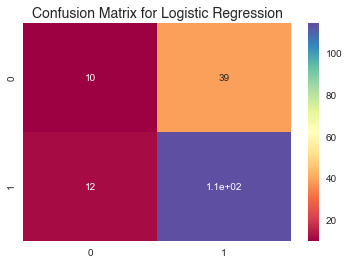

In [166]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_lr = lr.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for Logistic Regression", fontsize=14, fontname="Helvetica", y=1.03);

In [167]:
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.45      0.20      0.28        49
           1       0.75      0.90      0.82       126

    accuracy                           0.71       175
   macro avg       0.60      0.55      0.55       175
weighted avg       0.66      0.71      0.67       175



In [173]:
y_pred_lr2 = lr.predict(X_train)

print(metrics.classification_report(y_train, y_pred_lr2))

              precision    recall  f1-score   support

           0       0.60      0.32      0.42       118
           1       0.77      0.91      0.83       290

    accuracy                           0.74       408
   macro avg       0.69      0.62      0.63       408
weighted avg       0.72      0.74      0.71       408



In [168]:
from sklearn.naive_bayes import GaussianNB

In [169]:
gnb=GaussianNB()
model=gnb.fit(X_train,y_train)


In [170]:
pred=model.predict(X_test)

In [171]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.40      0.94      0.56        49
           1       0.95      0.44      0.61       126

    accuracy                           0.58       175
   macro avg       0.67      0.69      0.58       175
weighted avg       0.79      0.58      0.59       175



In [172]:
pred2=model.predict(X_train)
print(metrics.classification_report(y_train, pred2))

              precision    recall  f1-score   support

           0       0.39      0.96      0.56       118
           1       0.96      0.39      0.56       290

    accuracy                           0.56       408
   macro avg       0.67      0.68      0.56       408
weighted avg       0.79      0.56      0.56       408



In [175]:
print(metrics.cohen_kappa_score(y_test, pred))

0.2702918832467013


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
model2 = knn.fit(X_train,y_train)

pred = model2.predict(X_test)